## **Graph Analytics Lab Test**
### **Question : Subgraph identification(Traingles)**
* Created By : Blessy Louis (2348416) 4MDS'B'
* Created ON : 09.09.2024
* Submitted ON : 09.09.2024

Number of nodes: 5242
Number of edges: 28980
Number of triangles: 48260


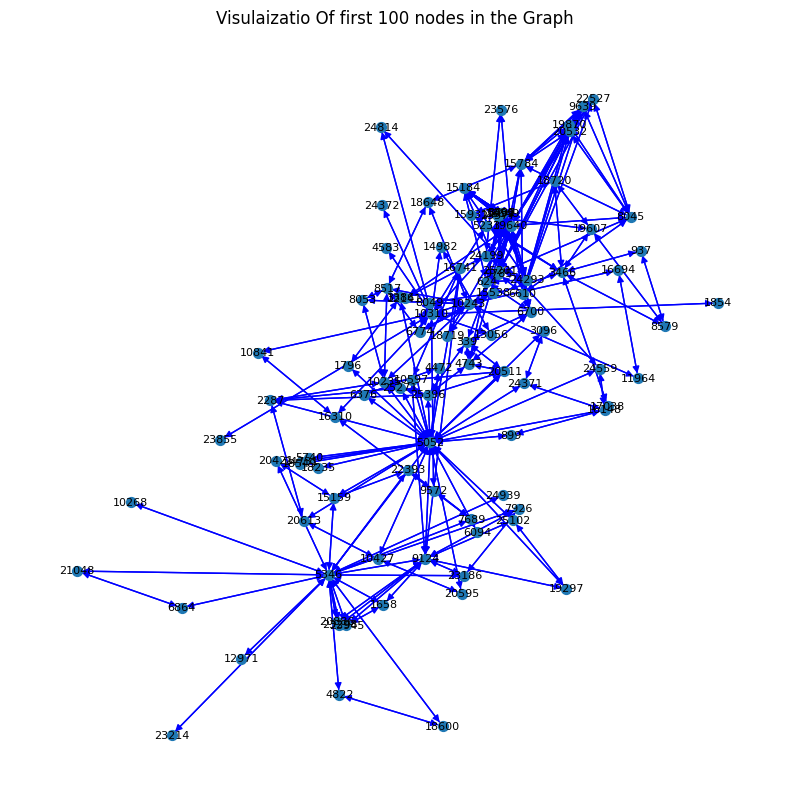

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the graph data from the CA-GrQc file
def load_graph(file_path):
    G = nx.DiGraph()  # Directed graph
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("#"):  # Skip comment lines
                continue
            from_node, to_node = map(int, line.strip().split())
            G.add_edge(from_node, to_node)
    return G

# Analyze triangles and subgraphs
def analyze_graph(G):
    # Convert to undirected graph
    undirected_G = G.to_undirected()

    # Finding triangles in the undirected graph
    triangles = nx.triangles(undirected_G)

    # Count total number of triangles
    total_triangles = sum(triangles.values()) // 3

    # Print some analysis results
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Number of triangles: {total_triangles}")

    return triangles

#Visualize a small part of the graph
def visualize_graph(G, num_nodes=100):
    plt.figure(figsize=(10, 10))
    plt.title("Visulaizatio Of first 100 nodes in the Graph ")
    pos = nx.spring_layout(G)  # Layout for visualization
    subgraph = G.subgraph(list(G.nodes)[:num_nodes])  # Visualize only a subgraph of first 100 nodes
    nx.draw(subgraph, pos, with_labels=True, node_size=50, font_size=8, edge_color='blue')
    plt.show()

 #Main function
if __name__ == "__main__":
    # Load the CA-GrQc data file
    file_path = "/content/ca-GrQc.txt"
    G = load_graph(file_path)

    # Analyze triangles and subgraphs
    triangles = analyze_graph(G)

    # Visualize a small part of the graph
    visualize_graph(G)


<ipython-input-4-763334a44de9>:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Betweenness Centrality")


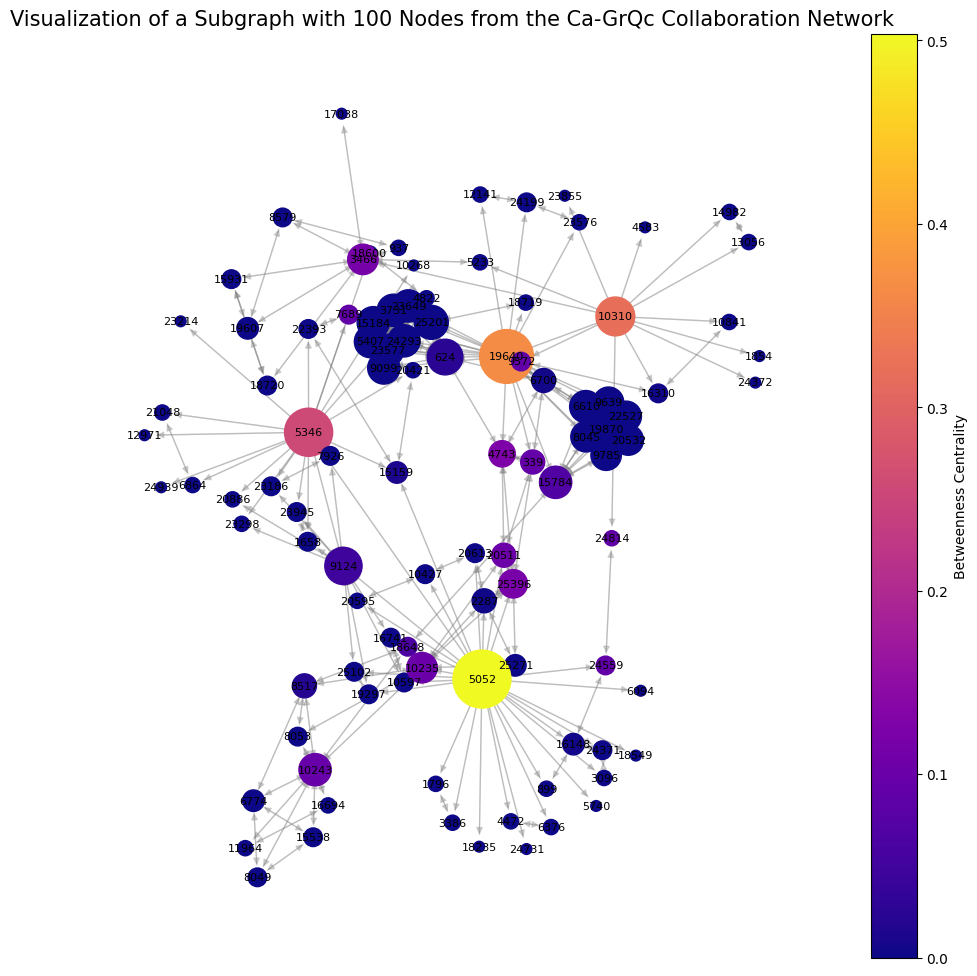

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the graph data from the CA-GrQc file
def load_graph(file_path):
    G = nx.DiGraph()  # Directed graph
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("#"):  # Skip comment lines
                continue
            from_node, to_node = map(int, line.strip().split())
            G.add_edge(from_node, to_node)
    return G

# Analyze the graph and return the subgraph of the first `num_nodes` nodes
def get_subgraph(G, num_nodes=100):
    # Extract a subgraph with the first `num_nodes` nodes
    subgraph = G.subgraph(list(G.nodes)[:num_nodes])
    return subgraph

# Visualize the graph with attractive enhancements
def visualize_graph(G, num_nodes=100):
    subgraph = get_subgraph(G, num_nodes)

    plt.figure(figsize=(12, 12))

    # Calculate node sizes based on degree and set node color based on centrality
    degree_dict = dict(subgraph.degree)
    node_sizes = [v * 30 for v in degree_dict.values()]
    # Calculate centrality (betweeness centrality used for color mapping)
    centrality = nx.betweenness_centrality(subgraph)
    node_colors = [centrality[node] for node in subgraph.nodes()]

    # Generate positions using spring layout (gives a visually appealing structure)
    pos = nx.spring_layout(subgraph, k=0.15, iterations=20)

    # Draw the subgraph with node size, color, and edge styles
    nx.draw_networkx_edges(subgraph, pos, alpha=0.3, edge_color='gray')
    nodes = nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma)

    # Add labels for the nodes
    nx.draw_networkx_labels(subgraph, pos, font_size=8, font_color='black', font_family='sans-serif')

    # Add a color bar for centrality
    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(centrality.values()), vmax=max(centrality.values())))
    sm.set_array([])
    plt.colorbar(sm, label="Betweenness Centrality")

    # Set title and remove axis for a cleaner look
    plt.title(f"Visualization of a Subgraph with {num_nodes} Nodes from the Ca-GrQc Collaboration Network", size=15)
    plt.axis('off')  # Hide the axis for a cleaner look

    # Show the plot
    plt.show()

# Step 4: Main function
if __name__ == "__main__":
    # Load the CA-GrQc data file
    file_path = "/content/ca-GrQc.txt"
    G = load_graph(file_path)

    # Visualize the subgraph with enhanced aesthetics
    visualize_graph(G, num_nodes=100)
